In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

from statsmodels.tools.eval_measures import rmse

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import statsmodels.api as sm

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


# 1. 의사결정나무모델

- 설명변수들의 규칙, 관계, 패턴 등으로 관심 대상인 목표변수를 분류하는 나무 구조의 모델을 만들고, 설명변수의 값을 생성된 모델에 입력하여 목표변수를 분류/예측하는 지도학습 기법

- 다양한 분류분석(고객 관리, 불량 개선, 금융 거래, 스포츠 예측)등에 활용되고 있음

- 분리기준
- 1) 지니지수(Gini index) : 불순도 측정지수로 부모 노드의 지니지수를 가장 많이 감소시키는 설명변수와 분리 값을 기준으로 자식노드를 형성, 지니 지수가 낮을수록 순수도는 높음
- 2) 엔트로피 지수(Entropy index) : 무질서 측정지수로 부모 노드의 엔트로피 지수를 가장 많이 감소시키는 설명변수와 분리 값을 기준으로 자식노드 생성, 분리에 필요한 기대 정보량으로 엔트로피가 낮을수록 순수도는 높음

1) 분류 :범주형 레이블 예측

2) 회귀 : 목표변수의 평균값 예측

In [2]:
df_raw = pd.read_csv('/home/piai/test/2. Big Data 분석/유방암.csv', encoding='cp949')

In [3]:
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [5]:
df_raw.shape

(320, 31)

In [6]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

- 유방암 데이터는 총 31개의 칼럼으로 이루어져 있으며 총 데이터의 행의 개수는 320개이다. 유방암 데이터 셋의 피쳐들은 유방암 세포 특징에 대한 것이다.

- diagnosis : 양성 여부
- radius : 반경(중심에서 외벽까지 거리들의 평균 값)
- texture : 질감(gray-scale 값들의 표준편차)
- perimeter : 둘레
- area : 면적
- smoothness : 매끄러움
- compactness : 조그만 정도 (둘레^2/면적 -1)
- concavity : 오목함
- concave_points : 오목함 점의 수
- symmetry : 대칭
- fractal_dimension : 프렉탈 차원

# 1-0) 목표변수 빈도확인 

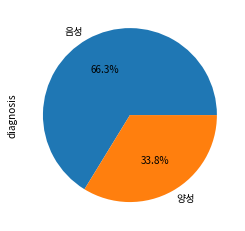

In [7]:
df_raw['diagnosis'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

**불균형자료**

: 목표변수의 분포가 매우 치우친, 즉 관심있는 값의 빈도가 매우 작은 자료로 모델을 사용하여서 예측을 하면 정확도(accuracy)는 높지만 재현율(recall, 실제 1을 1로 분류할 확률)이 급격히 작아져 모델의 성능이 안좋아진다.

: 해결방법에는 정상자료는 일부만 사용하고 관심자료는 전부 사용하는 Under-sampling, 정상자료를 전부 사용하고 관심자료를 복제하는 Over-sampling, 정상자료 및 관심자료를 둘 다 줄이고 늘리는 Both-sampling, 기존 데이터의 성격을 크게 해치지 않는 범위에서 새로운 것을 만들어내는 Synthetic 등의 방법이 있다.

- 불균형 자료를 해결하기 전에 train dataset과 test dataset을 나눠야하는데 이는 train 데이터로 모델을 학습시키고 학습시킨 모델을 test 데이터로 성능을 평가하기 때문이다. 만약 데이터를 나누기 전에 데이터를 복제해버리면 train data와 test data에 동일한 데이터가 들어가 모델의 성능이 지나치게 높게 보일 수도 있다.

- 보통은 9:1로 기준을 설정한다.

- 현재 분석대상인 유방암 데이터의 음성과 양성을 pie plot으로 비교해 보았을 때 음성 66:34로 비율이 그렇게 큰 차이가 나지는 않아 따로 Oversampling이나 Undersampling을 진행하지 않는다.

# 1-1) 데이터 구성하기 - 더미변수 생성

- get_dummies 메소드는 데이터의 타입이 object 인 변수들을 더미화해준다.
- 여기서 더미화는 칼럼을 0 또는 1이 되도록 만드는 것이다. 
- 통계분야에서는 만약 unique한 범주값이 3개인 변수를 더미화하면 변수가 2개 생성되어서 [0,0], [0,1], [1,0]과 같이 표현되지만 머신러닝 분야에서는 unique한 범주값이 3개인 변수를 더미화하면 변수가 3개 생성되고 [1,0,0], [0,1,0], [0,0,1] 과 같이 표현된다.

In [8]:
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


- 현재 데이터에는 범주형 독립변수가 없기 때문에 더미변수를 생성하지 않는다.

# 1-2) 데이터 구성하기 - 데이터 분할(6:4)

- 데이터를 분할할 때 6:4, 7:3, 8:2 와 같은 기준은 데이터분석가가 임의로 정하는데 이는 학습할 데이터의 양에 따라 결정된다. 예를 들어 전체 데이터 개수가 엄청 많은 경우 6:4로 분할하여도 학습할 데이터 수가 충분히 많기 때문에 테스트 데이터를 많이 두어 모델의 일반화 성능을 보는 것이 좋을테지만 데이터 수가 적을 경우 모델이 충분히 학습하는 것이 중요하기 때문에 8:2 로 split하는 경우도 있다. 이 과제에서는 6:4로 split 하라고 명시되어있으니 6:4로 split하였다.

In [9]:
df_raw_x = df_raw.drop('diagnosis', axis=1, inplace=False)
df_raw_y = df_raw['diagnosis']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)

print('분할 전 설명변수 데이터:' ,df_raw_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape,'Test', df_test_x.shape)

분할 전 설명변수 데이터: (320, 30)
분할 후 설명변수 데이터:Train (192, 30) Test (128, 30)


# 1-3) 모델 생성 - 기본옵션(default)

In [10]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.883


- 의사결정나무에서 디폴트 값으로 모델을 만들어 train data에 피팅시켰을 때 훈련데이터 셋의 정확도는 1.0 테스트 데이 셋의 정확도는 0.883이 나온다. 이는 모델이 train data에만 적합하고 새로운 데이터가 들어왔을 때 잘 예측하지 못하는 과적합인 것으로 보인다.

# 1-4-1) 모델 파라미터 조정 - max_depth

In [15]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [16]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883
5,6,1.000,0.883
6,7,1.000,0.883
7,8,1.000,0.883
8,9,1.000,0.883
9,10,1.000,0.883


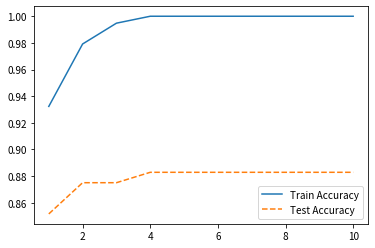

In [17]:
plt.plot(para_depth, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.legend()

- 모델이 max_depth가 4일 때부터 train 데이터셋은 1로 수렴하고 test 데이터셋은 0.883으로 수렴한다. 그렇다고 depth를 너무 적게 하기에는 데이터셋에 대해 충분히 학습하지 못하는 과소적합이 일어날 수 있으므로 max_depth는 4로 설정한다.

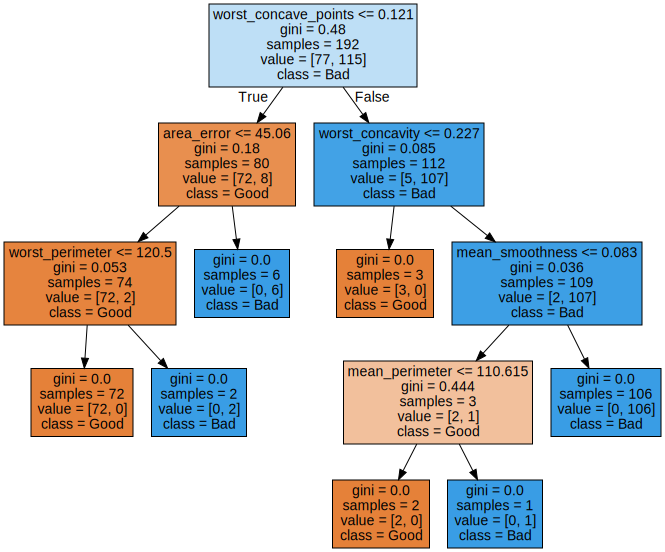

In [18]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth=4, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'],
               feature_names=v_feature_name, impurity=True, filled=True)

with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 1-4-2) 모델 파라미터 조정 - min_samples_split

In [19]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth=4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [20]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.875
1,20,0.995,0.875
2,30,0.995,0.875
3,40,0.995,0.875
4,50,0.995,0.875
5,60,0.995,0.875
6,70,0.995,0.875
7,80,0.984,0.867
8,90,0.953,0.844
9,100,0.953,0.844


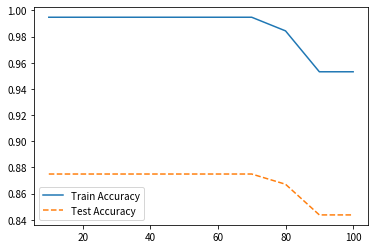

In [21]:
plt.plot(para_split, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.legend()

- 분리노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 해당 그래프를 보면 MinSamplesSplit이 70일때까지 정확도가 수렴하다가 이후에 train, test 모두 정확도가 떨어지는 것을 볼 수 있다. 그렇기 때문에 MinSamplesSplit을 70으로 설정한다.

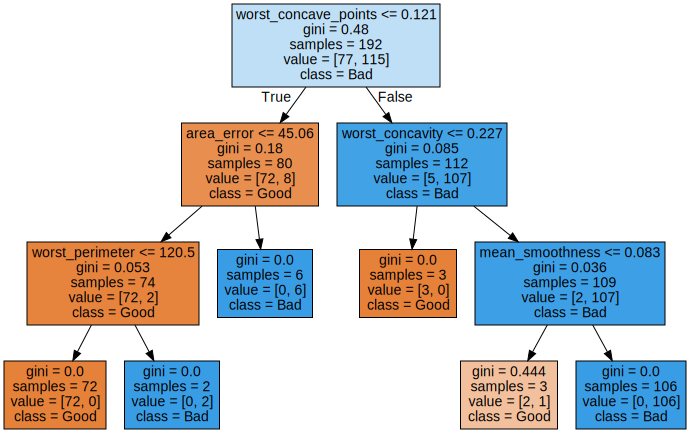

In [22]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth=4, min_samples_split=70, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'],
               feature_names=v_feature_name, impurity=True, filled=True)

with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 1-4-3) 모델 파라미터 조정 - min_samples_leaf

In [23]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf, max_depth=4, random_state=1234, min_samples_split=70)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [24]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.995,0.875
1,4,0.974,0.859
2,6,0.964,0.859
3,8,0.958,0.898
4,10,0.953,0.914
5,12,0.943,0.906
6,14,0.932,0.852
7,16,0.932,0.852
8,18,0.932,0.852
9,20,0.932,0.852


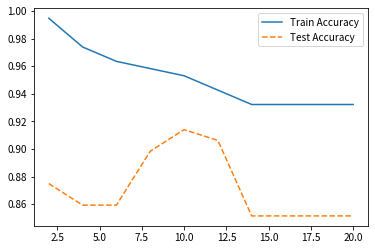

In [25]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.legend()

- 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소한다. train dataset에 대한 정확도는 점점 떨어지지만 test dataset을 보면 MinSamplesLeaf가 10일때에 성능이 엄청나게 높아진 것을 볼 수 있다. train data와 test data의 성능이 모두 좋고 둘 간의 차이도 얼마 나지 않기 때문에 MinSamplesLeaf을 10으로 설정한다.

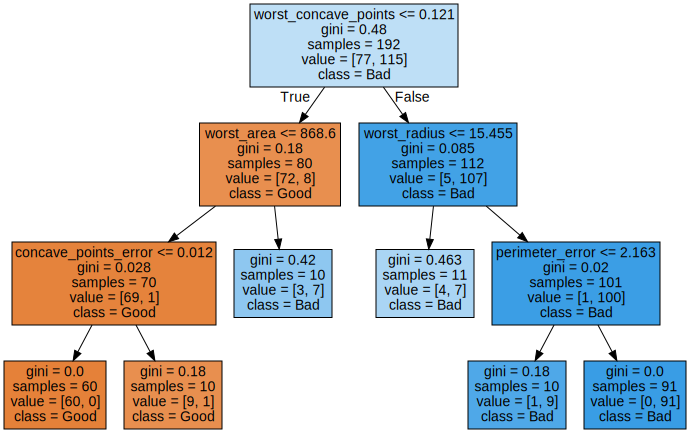

In [26]:
tree_low = DecisionTreeClassifier(max_depth=4, min_samples_split=70,min_samples_leaf=10, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'],
               feature_names=v_feature_name, impurity=True, filled=True)

with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 1-5) 최종 모델 선정

In [27]:
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=70,min_samples_leaf=10, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=70,
                       random_state=1234)

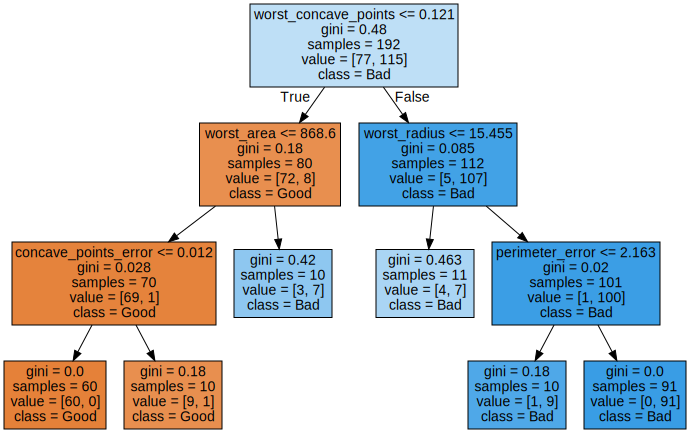

In [28]:
export_graphviz(tree_final, out_file='tree_final.dot', class_names=['Good', 'Bad'],
               feature_names=v_feature_name,impurity=True, filled=True)

with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 트리 분리에 영향이 큰 변수는 worst_concave_points(오목한 점의 수 중 제일 큰 3개의 평균), worst_area(평균 면적 중 제일 큰 3개의 평균), worst_radius(평균 반경 중 제일 큰 3개의 평균) 등 이다. worst_concave_points(오목한 점의 수 중 제일 큰 3개의 평균) <= 0.121 이 False면 자료수=112고 모든 데이터가 Bad로 분리된다. 반대로 True이면 worst_area <= 868.6 이라는 조건에 따라서 True일 때 데이터가 Good로 분리되고 False일 때는 Bad로 분리된다.

In [29]:
y_pred = tree_final.predict(df_test_x)

print('Accuracy: {0:.3f}\n'.format(tree_final.score(df_test_x,df_test_y)))
print('Confusion matrix:\n {}'.format(confusion_matrix(df_test_y,y_pred)))
print()
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.914

Confusion matrix:
 [[23  8]
 [ 3 94]]

              precision    recall  f1-score   support

          양성      0.885     0.742     0.807        31
          음성      0.922     0.969     0.945        97

    accuracy                          0.914       128
   macro avg      0.903     0.856     0.876       128
weighted avg      0.913     0.914     0.911       128



- test data로 예측을 하고 점수를 찍어본 결과 기존 default 모델의 0.883 보다 0.031이 오른 0.914로 모델의 성능은 좋아졌다. 하지만 confusion matrix를 통해 precision, recall 등을 본 결과 양성에 대한 recall이 낮은 것을 볼 수 있다. recall 은 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율인데 이것이 낮다면 실제 유방암인 환자들이 자신이 유방암인지 모르고 간과하다가 큰일날 수도 있기 때문에 정확도는 높지만 유방암 데이터에는 적합하지 않는 모델이라고 판단된다. 

In [30]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,worst_concave_points,0.861
23,worst_area,0.104
20,worst_radius,0.031
12,perimeter_error,0.002
17,concave_points_error,0.002
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000


Text(0, 0.5, '설명변수')

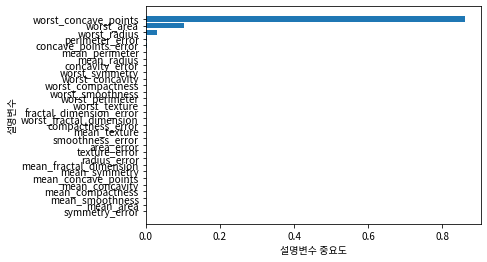

In [33]:
df_importance.sort_values("Importance", ascending =True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

-  세포의 평균 오목한 점의 수 중 제일 큰 3개의 평균, 세포의 평균 면적 중 제일 큰 3개의 평균, 세포의 평균 반경 중 제일 큰 3개의 평균 순으로 변수의 중요도가 나왔다.

- feature importance는 변수들에서 하나의 변수를 빼고 돌리면서 정분류, 오분류율을 보고 중요도를 판단한다. 유방암 데이터에서 영향이 큰 변수들의 공통점을 보았을 때 전부 worst가 있는데 이는 많은 큰 세포들의 형태가 유방암에 많은 영향을 끼친다는 것으로 볼 수 있다. 또한 목적변수에 대한 다른 독립변수들의 영향은 상대적으로 매우 낮다는 것을 알 수 있다. 

- 단 산출된 변수 중요도 값이 낮거나 0이더라도 선택되는 훈련 데이터에 따라 중요도는 변경 될 수 있다.

In [34]:
estimator = DecisionTreeClassifier()
param_grid= {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=20)

best parameter: 
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 20}

best score: 
0.937


In [69]:
grid_dt.best_estimator_.score(df_test_x,df_test_y)

0.875

- grid search를 돌렸을 때 가장 좋은 파라미터는 max_depth = 4, min_samples_leaf=2, min_samples_split=20 이라고 하고 정확도는 0.937이 나왔다. 이는 성능이 나쁘다고 할 수는 없지만 파라미터를 보면 min_samples_leaf가 2인데 그러면 과적합의 위험이 높다. 그래서 해당 모델을 train 데이터 말고 test 데이터에 넣어 정확도를 확인해보니 0.875가 나왔다. 예상과 같이 train data에만 적합한 과적합이라고 판단할 수 있다.

# 2. 랜덤포레스트 모델

- 독립적으로 다수의 결정 트리를 생성하고 그 결과를 결합한(예측 레이블 빈도/확률) 최종 모델을 생성함으로써 성능을 높이고 과대적합을 방지하여 안정적인 모델을 생성하는 앙상블 방법

- 일반적으로 설명변수 및 표본을 무작위로 추출하여 모델을 생성
- 생성된 다수 모델의 분류결과를 결합하여 다수결 투표로 레이블 결정
- 하나의 결정 트리보다 과대적합 위험이 낮고 예측 성능이 높음

In [35]:
df_raw = pd.read_csv('/home/piai/test/2. Big Data 분석/유방암.csv', encoding='cp949')

In [36]:
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


In [37]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [38]:
df_raw.shape

(320, 31)

In [39]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

- 유방암 데이터는 총 31개의 칼럼으로 이루어져 있으며 총 데이터의 행의 개수는 320개이다. 유방암 데이터 셋의 피쳐들은 유방암 세포 특징에 대한 것이다.

- diagnosis : 양성 여부
- radius : 반경(중심에서 외벽까지 거리들의 평균 값)
- texture : 질감(gray-scale 값들의 표준편차)
- perimeter : 둘레
- area : 면적
- smoothness : 매끄러움
- compactness : 조그만 정도 (둘레^2/면적 -1)
- concavity : 오목함
- concave_points : 오목함 점의 수
- symmetry : 대칭
- fractal_dimension : 프렉탈 차원

# 2-0) 목표변수 빈도확인 

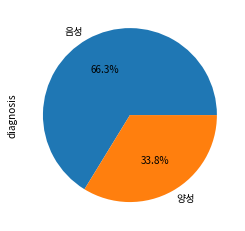

In [40]:
df_raw['diagnosis'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

**불균형자료**

: 목표변수의 분포가 매우 치우친, 즉 관심있는 값의 빈도가 매우 작은 자료로 모델을 사용하여서 예측을 하면 정확도(accuracy)는 높지만 재현율(recall, 실제 1을 1로 분류할 확률)이 급격히 작아져 모델의 성능이 안좋아진다.

: 해결방법에는 정상자료는 일부만 사용하고 관심자료는 전부 사용하는 Under-sampling, 정상자료를 전부 사용하고 관심자료를 복제하는 Over-sampling, 정상자료 및 관심자료를 둘 다 줄이고 늘리는 Both-sampling, 기존 데이터의 성격을 크게 해치지 않는 범위에서 새로운 것을 만들어내는 Synthetic 등의 방법이 있다.

- 불균형 자료를 해결하기 전에 train dataset과 test dataset을 나눠야하는데 이는 train 데이터로 모델을 학습시키고 학습시킨 모델을 test 데이터로 성능을 평가하기 때문이다. 만약 데이터를 나누기 전에 데이터를 복제해버리면 train data와 test data에 동일한 데이터가 들어가 모델의 성능이 지나치게 높게 보일 수도 있다.

- 보통은 9:1로 기준을 설정한다.

- 현재 분석대상인 유방암 데이터의 음성과 양성을 pie plot으로 비교해 보았을 때 음성 66:34로 비율이 그렇게 큰 차이가 나지는 않아 따로 Oversampling이나 Undersampling을 진행하지 않는다.

# 2-1) 데이터 구성하기 - 더미변수 생성

- get_dummies 메소드는 데이터의 타입이 object 인 변수들을 더미화해준다.
- 여기서 더미화는 칼럼을 0 또는 1이 되도록 만드는 것이다. 
- 통계분야에서는 만약 unique한 범주값이 3개인 변수를 더미화하면 변수가 2개 생성되어서 [0,0], [0,1], [1,0]과 같이 표현되지만 머신러닝 분야에서는 unique한 범주값이 3개인 변수를 더미화하면 변수가 3개 생성되고 [1,0,0], [0,1,0], [0,0,1] 과 같이 표현된다.

In [8]:
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


- 현재 데이터에는 범주형 독립변수가 없기 때문에 더미변수를 생성하지 않는다.

# 2-2) 데이터 구성하기 - 데이터 분할(6:4)

- 데이터를 분할할 때 6:4, 7:3, 8:2 와 같은 기준은 데이터분석가가 임의로 정하는데 이는 학습할 데이터의 양에 따라 결정된다. 예를 들어 전체 데이터 개수가 엄청 많은 경우 6:4로 분할하여도 학습할 데이터 수가 충분히 많기 때문에 테스트 데이터를 많이 두어 모델의 일반화 성능을 보는 것이 좋을테지만 데이터 수가 적을 경우 모델이 충분히 학습하는 것이 중요하기 때문에 8:2 로 split하는 경우도 있다. 이 과제에서는 6:4로 split 하라고 명시되어있으니 6:4로 split하였다.

In [57]:
df_raw_x = df_raw.drop('diagnosis', axis=1, inplace=False)
df_raw_y = df_raw['diagnosis']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)

print('분할 전 설명변수 데이터:' ,df_raw_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape,'Test', df_test_x.shape)

분할 전 설명변수 데이터: (320, 30)
분할 후 설명변수 데이터:Train (192, 30) Test (128, 30)


# 2-3) 모델 생성 - 기본 옵션

In [58]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on training set: {:.3f}'.format(rf_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on test set: {:.3f}'.format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.914


- 해당 모델이 train dataset에는 1.000이라는 높은 정확도가 나오지만 test dataset에는 0.914라는 train보다 상대적으로 낮은 정확도가 나온것을 확인할 수 있다. 이것을 보고 default RandomForest모델은 train dataset에만 적합한 과적합이라는 것을 알 수 있다. 

In [56]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]
for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] =  test_accuracy

In [47]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.995,0.906
1,20,1.000,0.914
2,30,1.000,0.906
3,40,1.000,0.906
4,50,1.000,0.922
5,60,1.000,0.922
6,70,1.000,0.914
7,80,1.000,0.914
8,90,1.000,0.922
9,100,1.000,0.914


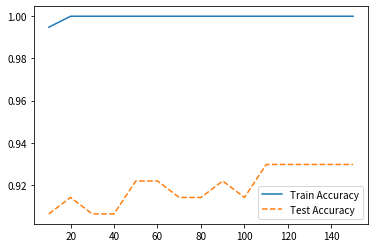

In [43]:
plt.plot(para_n_tree, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--',label='Test Accuracy')
plt.legend()

- n_estimators의 개수를 보면 train dataset의 경우 20부터 1.000으로 수렴하는 형태를 보이며 test dataset은 110부터 0.930으로 수렴한다. 이것으로 임시로 n_estimators를 110으로 설정하고 oob_error를 통해 확정하고자 한다.

### * oob error

: Random Forest를 구성하는 과정에서 각 데이터 포인트에 대해 oob error가 구해진다. oob 데이터는 bootstrap을 통해 랜덤으로 중복추출 했을 때 train 데이터에 속하지 않는 데이터를 말하며, oob error는 bootstrap에 포하되지 않은 데이터를 Decision Tree를 통해 나온 예측값과 실제값의 차이이다. 

In [44]:
oob_error = []
for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    oob_error.append(1 - rf.oob_score_)

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do no

In [48]:
## oob 데이터프레임을 만들어 n_estimator의 개수별 oob_error를 확인
oob_df = pd.DataFrame(columns = ['num', 'oob_error'])

oob_df['num'] = [i for i in range(1,151)]
oob_df['oob_error'] = oob_error

In [53]:
## oob 데이터프레임을 oob_error 기준으로 정렬하면 값의 분포는 그리 크지 않지만 oob_error가 0.041667 인 n_estimator는 너무 적어 과소적합이 날 수도 있어 
## 그 다음 값인 0.046875 을 보면 위에서 임시로 정했던 110이 존재한다. 
oob_df.sort_values(by = 'oob_error').head(50)

,num,oob_error
29,30,0.041667
31,32,0.041667
33,34,0.041667
13,14,0.041667
30,31,0.041667
32,33,0.046875
34,35,0.046875
36,37,0.046875
37,38,0.046875
38,39,0.046875


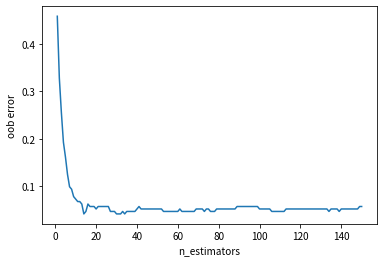

In [46]:
plt.plot(range(1,151),oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

- n_estimators 110으로 확정

In [60]:
n_estimators=110

# 2-4-1) 모델 파라미터 조정 - max_depth

In [64]:
train_accuracy=[];test_accuracy=[]
para_depth=[depth for depth in range(1,11)]
for v_max_depth in para_depth:
    rf=RandomForestClassifier(max_depth=v_max_depth,n_estimators=110,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["TestAccuracy"]=test_accuracy

In [65]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.948,0.914
1,2,0.974,0.906
2,3,0.990,0.914
3,4,1.000,0.922
4,5,1.000,0.922
5,6,1.000,0.930
6,7,1.000,0.930
7,8,1.000,0.930
8,9,1.000,0.930
9,10,1.000,0.930


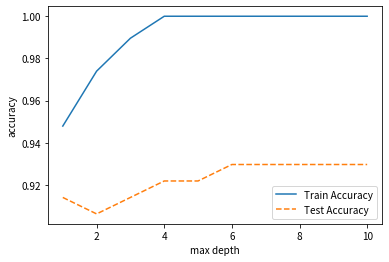

In [66]:
plt.plot(para_depth,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle="--",label="Test Accuracy")
plt.xlabel("max depth");plt.ylabel("accuracy")
plt.legend()

- train data set은 max_depth가 4일때부터 1로 수렴하지만 test data set은 max_depth가 6일때부터 0.930으로 수렴한다. max_depth가 너무 높아도 과적합의 위험이 있지만 max_depth가 너무 낮으면 과소적합일 수가 있으니 test accuracy를 적정하다고 판단되는 6으로 설정한다.

# 2-4-2) 모델 파라미터 조정 - min_samples_split

In [76]:
train_accuracy=[]; test_accuracy=[]
para_split=[n_split*10 for n_split in range(1,20)]
for v_min_samples_split in para_split:
    rf=RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth=6,
                             n_estimators=110,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
#데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [77]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.906
1,20,0.984,0.906
2,30,0.984,0.914
3,40,0.984,0.906
4,50,0.979,0.898
5,60,0.964,0.883
6,70,0.948,0.891
7,80,0.948,0.914
8,90,0.948,0.914
9,100,0.948,0.914


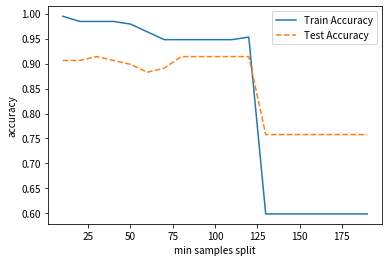

In [78]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('min samples split');plt.ylabel('accuracy')
plt.legend()

- min samples split이 130 일때 train과 test 모두 score가 급격히 하락하는 것을 볼 수 있다. 이것은 min samples split이 노드의 최소자료 수를 제한해 min samples split이 늘어나면 과소적합이 일어날 수 있음을 보여준다. 그렇기 때문에 TrainAccuracy도 0.984로 높고 TestAccuracy도 0.914로 높은 MinSamplesSplit를 30으로 설정한다.

# 2-4-3) 모델 파라미터 조정 - min_samples_leaf

In [87]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf=v_min_samples_leaf, max_depth=6, n_estimators=110 ,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [88]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.974,0.906
1,20,0.969,0.906
2,30,0.969,0.898
3,40,0.948,0.906
4,50,0.964,0.914
5,60,0.953,0.914
6,70,0.599,0.758
7,80,0.599,0.758
8,90,0.599,0.758
9,100,0.599,0.758


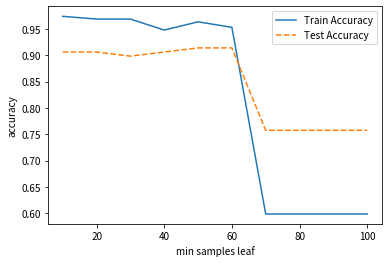

In [89]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.xlabel('min samples leaf'); plt.ylabel('accuracy')
plt.legend()

- min samples leaf는 입사귀 노드의 최소 자료 수를 제한하는데 낮아질수록 과적합이 일어날 가능성이 높아진다. 그래프와 데이터프레임을 보면 MinSamplesLeaf가 70일 때 train과 test의 score가 급격하게 떨어지는 것을 볼 수 있다. 이것으로 MinSamplesLeaf가 너무 커지면 과소적합이 일어나는 것을 알 수 있다. MinSamplesLeaf는 TestAccuracy가 0.906으로 높은 편이고 TrainAccuracy가 가장 높은 10으로 설정한다.

# 2-5) 최종 모델 선정

In [90]:
rf_final = RandomForestClassifier(min_samples_leaf=10, max_depth=6, n_estimators=110, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print('Accuracy on training set: {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.974
Accuracy on test set: 0.906
Confusion matrix: 
[[24  7]
 [ 5 92]]
              precision    recall  f1-score   support

          양성      0.828     0.774     0.800        31
          음성      0.929     0.948     0.939        97

    accuracy                          0.906       128
   macro avg      0.878     0.861     0.869       128
weighted avg      0.905     0.906     0.905       128



- test data로 예측을 하고 점수를 찍어본 결과 기존 default 모델의 0.914 보다 0.008이 줄어든 0.906로 모델의 성능이 안좋아졌다. 또한 confusion matrix를 통해 precision, recall 등을 본 결과 양성에 대한 recall이 낮은 것을 볼 수 있다. recall 은 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율인데 이것이 낮다면 실제 유방암인 환자들이 자신이 유방암인지 모르고 간과하다가 큰일날 수도 있기 때문에 정확도는 높지만 유방암 데이터에는 적합하지 않는 모델이라고 판단된다. 

In [91]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,mean_concave_points,0.154
22,worst_perimeter,0.154
27,worst_concave_points,0.122
6,mean_concavity,0.120
20,worst_radius,0.093
23,worst_area,0.074
26,worst_concavity,0.067
2,mean_perimeter,0.054
0,mean_radius,0.034
3,mean_area,0.027


Text(0, 0.5, '설명변수')

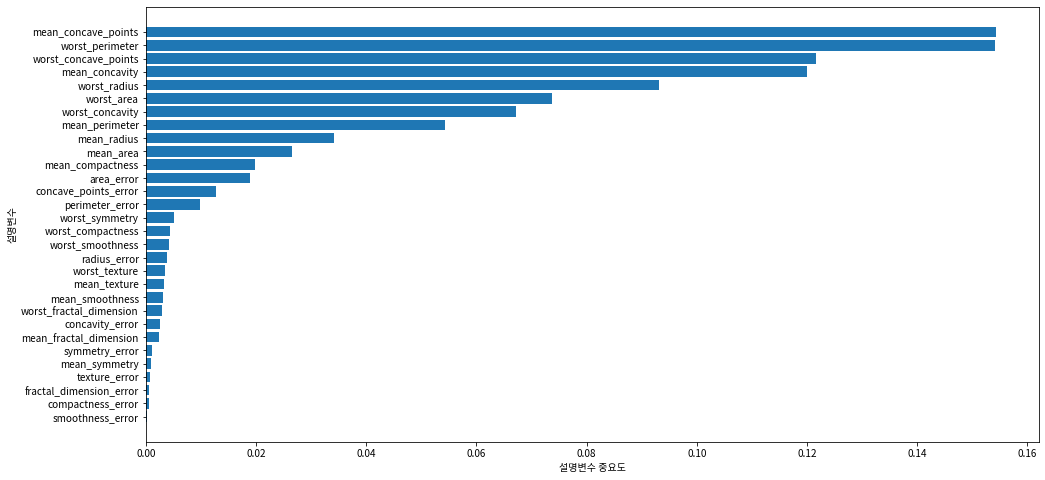

In [96]:
df_importance.sort_values("Importance", ascending =True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (16,8))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

- 세포의 평균 오목한 점의 수, 세포의 평균 둘레 중 제일 큰 3개의 평균, 세포의 평균 오목한 점의 수 중 제일 큰 3개의 평균, 세포의 평균 오목함 등이 중요변수로 나왔다. 

- feature importance는 변수들에서 하나의 변수를 빼고 돌리면서 정분류, 오분류율을 보고 중요도를 판단한다. 이전의 의사결정나무와는 다르게 많은 변수들이 중요하다고 나왔고 순서 또한 매우 다르다.

- 데이터에 따라 그리고 모델에 따라 다르지만 세포의 평균 오목한 점의 수 중 제일 큰 3개의 평균 피쳐가 중복되어 중요변수로 나오는 것으로 미루어 보아 유방암 세포를 판단하는데에 중요한 변수인 것으로 유추해 볼 수 있다. 추후에 다른 모델에도 적용하여 중요피쳐를 확인해보면 좋을 것 같다.